# Homework Module 1

In [ ]:
#!pip install pyarrow

In [1]:
!python -V

Python 3.10.9


In [2]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

### Question 1: Number of columns in Jan 2022 Yellow Taxi Trip data

In [3]:
df_train = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
df_val = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')

print(df_train.shape)
print(df_val.shape)

(2463931, 19)
(2979431, 19)


In [4]:
df_train.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [5]:
df_train['duration'] = (df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']).dt.total_seconds()/60
df_val['duration'] = (df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']).dt.total_seconds()/60

In [6]:
df_train.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
2440995,2,2022-01-25 07:54:34,2022-01-25 08:09:46,NaN,3.29,NaN,None,262,48,0,14.74,0.0,0.5,3.89,0.0,0.3,21.93,NaN,NaN,15.200000
1621560,2,2022-01-22 10:57:10,2022-01-22 11:08:30,1.0,2.84,1.0,N,164,140,1,10.50,0.0,0.5,2.76,0.0,0.3,16.56,2.5,0.0,11.333333
1051270,1,2022-01-15 11:48:38,2022-01-15 11:52:34,1.0,1.20,1.0,N,68,48,1,5.50,2.5,0.5,1.75,0.0,0.3,10.55,2.5,0.0,3.933333
421990,2,2022-01-07 09:56:12,2022-01-07 10:04:37,1.0,1.50,1.0,N,140,237,1,8.00,0.0,0.5,2.26,0.0,0.3,13.56,2.5,0.0,8.416667
1338048,2,2022-01-19 08:32:49,2022-01-19 08:40:33,1.0,1.67,1.0,N,237,43,1,7.50,0.0,0.5,1.08,0.0,0.3,11.88,2.5,0.0,7.733333
172422,2,2022-01-03 18:18:26,2022-01-03 18:24:16,1.0,0.82,1.0,N,237,237,1,6.00,1.0,0.5,2.06,0.0,0.3,12.36,2.5,0.0,5.833333
1960558,2,2022-01-26 12:45:06,2022-01-26 13:17:30,1.0,3.85,1.0,N,186,236,2,20.50,0.0,0.5,0.00,0.0,0.3,23.80,2.5,0.0,32.400000
2204223,2,2022-01-28 21:31:00,2022-01-28 21:46:05,1.0,7.08,1.0,N,238,127,1,21.00,0.5,0.5,4.96,0.0,0.3,29.76,2.5,0.0,15.083333
536287,1,2022-01-08 17:06:42,2022-01-08 17:10:42,1.0,0.60,1.0,N,237,161,2,5.00,2.5,0.5,0.00,0.0,0.3,8.30,2.5,0.0,4.000000
2031480,2,2022-01-27 07:24:30,2022-01-27 07:35:09,3.0,2.22,1.0,N,140,161,1,10.00,0.0,0.5,2.66,0.0,0.3,15.96,2.5,0.0,10.650000


### Question 2:  Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data

In [7]:
df_train['duration'].std()

46.44530513776499

In [8]:
df_train['duration'].describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

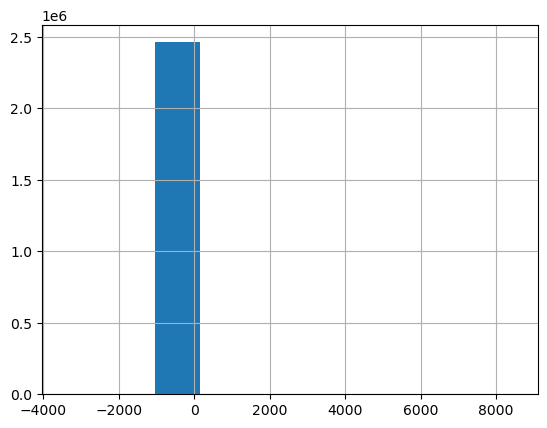

In [9]:
df_train['duration'].hist();

### Question 3: Fraction of the records left after dropping the outliers

In [10]:
df_train.query("duration >= 1 and duration <= 60").shape[0] / df_train.shape[0]

0.9827547930522406

In [11]:
df_train = df_train.query("duration >= 1 and duration <= 60")

In [12]:
df_train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

### Question 4: Dimensionality after OHE

In [13]:
cols = ['PULocationID', 'DOLocationID']
train_dicts = df_train[cols].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [14]:
X_train.shape

(2421440, 2)

### Question 5: RMSE on train

In [15]:
target = 'duration'
y_train = df_train[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

8.920327827581444

In [16]:
df_val = df_val.query("duration >= 1 and duration <= 60")

In [17]:
val_dicts = df_val[cols].to_dict(orient='records')
X_val = dv.transform(val_dicts)

### Question 6: RMSE on validation

In [18]:
y_val = df_val[target].values

y_val_pred = lr.predict(X_val)

mean_squared_error(y_val, y_val_pred, squared=False)

9.638272212087234